In [1]:
import snowflake.connector
import pandas as pd
from sqlalchemy import create_engine
# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password= 'EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
)


/Users/jackson/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
cur = conn.cursor()

# Query to count unique flights
query = """
SELECT COUNT(DISTINCT CONCAT(SCHD_LEG_DEP_AIRPRT_IATA_CD, '_', 
                             SCHD_LEG_DEP_LCL_TMS, '_', 
                             SCHD_LEG_ARVL_LCL_TMS)) AS total_flights
FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
"""

# Execute query
cur.execute(query)
result = cur.fetchone()

# Print the total flights count
print(f"Total Unique Flights: {result[0]}")

Total Unique Flights: 246201


In [5]:
# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# Query to find the oldest and latest date
query = """
SELECT 
    MIN(SCHD_LEG_DEP_LCL_DT) AS oldest_date, 
    MAX(SCHD_LEG_DEP_LCL_DT) AS latest_date
FROM BAGROOM_ARRIVAL
"""

# Execute query
cur.execute(query)
result = cur.fetchone()

# Print results
print(f"Oldest Date: {result[0]}")
print(f"Latest Date: {result[1]}")

Oldest Date: 2024-01-01
Latest Date: 2024-12-31


   FLIGHT_MONTH  TOTAL_FLIGHTS
0       2024-01          19827
1       2024-02          19365
2       2024-03          21433
3       2024-04          20271
4       2024-05          20882
5       2024-06          21144
6       2024-07          21862
7       2024-08          20614
8       2024-09          19296
9       2024-10          21342
10      2024-11          19866
11      2024-12          20299


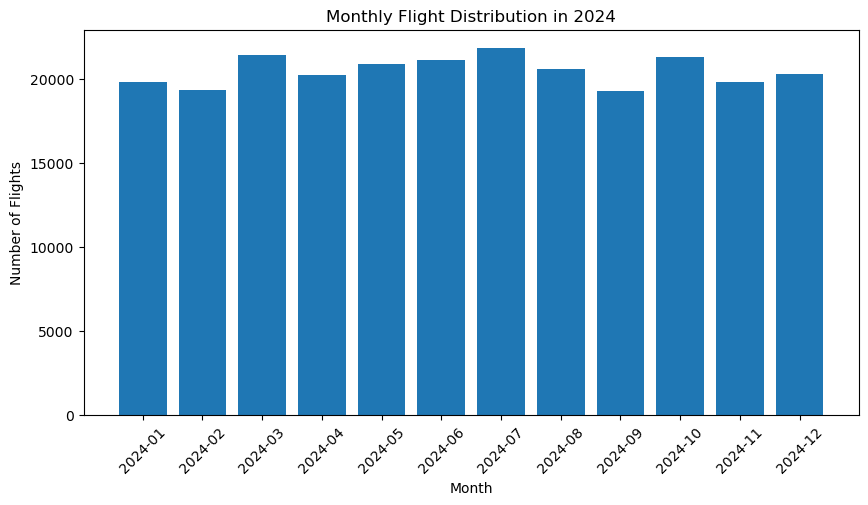

In [9]:
import matplotlib.pyplot as plt

query = """
SELECT 
    LEFT(SCHD_LEG_DEP_LCL_DT, 7) AS flight_month,  -- Extract 'YYYY-MM' from date
    COUNT(DISTINCT CONCAT(SCHD_LEG_DEP_AIRPRT_IATA_CD, '_', 
                          SCHD_LEG_DEP_LCL_TMS, '_', 
                          SCHD_LEG_ARVL_LCL_TMS)) AS total_flights
FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
WHERE SCHD_LEG_DEP_LCL_DT >= '2024-01-01' AND SCHD_LEG_DEP_LCL_DT < '2025-01-01'
GROUP BY flight_month
ORDER BY flight_month;

"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print results
print(df)

# Plot flight distribution
plt.figure(figsize=(10,5))
plt.bar(df['FLIGHT_MONTH'], df['TOTAL_FLIGHTS'])
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Monthly Flight Distribution in 2024')
plt.xticks(rotation=45)
plt.show()

      TIME_BIN  BAG_COUNT
0  105-120 min    5270150
1  120-135 min    4049578
2    30-45 min    2117364
3    45-60 min    3756829
4    60-75 min    5826705
5    75-90 min    6612885
6   90-105 min    6294194


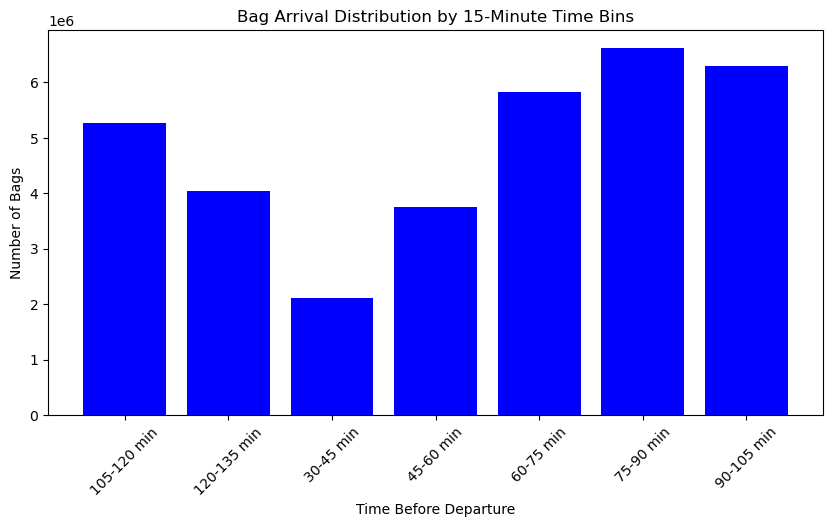

In [10]:


# Query to get bag count per time bin
query = """
SELECT 
    CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 30 AND 45 THEN '30-45 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 45 AND 60 THEN '45-60 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 60 AND 75 THEN '60-75 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 75 AND 90 THEN '75-90 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 90 AND 105 THEN '90-105 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 105 AND 120 THEN '105-120 min'
        WHEN TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 120 AND 135 THEN '120-135 min'
    END AS time_bin,
    COUNT(*) AS bag_count
FROM BAGROOM_ARRIVAL
WHERE TIMESTAMPDIFF(MINUTE, BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS) BETWEEN 30 AND 135
GROUP BY time_bin
ORDER BY time_bin;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print results
print(df)

# Plot distribution
plt.figure(figsize=(10, 5))
plt.bar(df['TIME_BIN'], df['BAG_COUNT'], color='blue')
plt.xlabel('Time Before Departure')
plt.ylabel('Number of Bags')
plt.title('Bag Arrival Distribution by 15-Minute Time Bins')
plt.xticks(rotation=45)
plt.show()



In [11]:

conn.close()

In [3]:
df

,OPERAT_AIRLN_IATA_CD,SCHD_LEG_DEP_AIRPRT_IATA_CD,OPERAT_FLIGHT_NBR,SCHD_LEG_DEP_LCL_DT,SCHD_LEG_ARVL_AIRPRT_IATA_CD,SCHD_LEG_DEP_LCL_TMS,SCHD_LEG_DEP_GMT_TMS,SCHD_LEG_DEP_GMT_DT,SCHD_LEG_ARVL_LCL_TMS,SCHD_LEG_ARVL_LCL_DT,...,AVL_STA_MIRS_PRIORITY_CD,AVL_STA_MIRS_PRIORITY_REGION_DESC,INTERNATIONAL,BANK_ID,MKT_DAY_FREQUENCY,MKT_WEEK_FREQUENCY,MKT_DAY_DEP_SEQ,BAG_SCAN_UTC_TMS,BAG_SCAN_LCL_TMS,SF_LOAD_TMS
0,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:00,2024-05-15 18:34:00,2025-01-09 16:59:25.688
1,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:33:27,2024-05-15 18:33:27,2025-01-09 16:59:25.688
2,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:55,2024-05-15 18:34:55,2025-01-09 16:59:25.688
3,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:35:04,2024-05-15 18:35:04,2025-01-09 16:59:25.688
4,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:36:17,2024-05-15 18:36:17,2025-01-09 16:59:25.688
5,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:36:48,2024-05-15 18:36:48,2025-01-09 16:59:25.688
6,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:37:44,2024-05-15 18:37:44,2025-01-09 16:59:25.688
7,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:42:01,2024-05-15 18:42:01,2025-01-09 16:59:25.688
8,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:43:25,2024-05-15 18:43:25,2025-01-09 16:59:25.688
9,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:43:51,2024-05-15 18:43:51,2025-01-09 16:59:25.688


In [5]:
cur = conn.cursor()

# Query to find baggage scans later than departure
query = """
SELECT * 
FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
WHERE BAG_SCAN_LCL_TMS > SCHD_LEG_DEP_LCL_TMS;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

print(df)

        OPERAT_AIRLN_IATA_CD SCHD_LEG_DEP_AIRPRT_IATA_CD OPERAT_FLIGHT_NBR  \
0                         AA                         DFW              2006   
1                         AA                         DFW              2006   
2                         AA                         DFW              2006   
3                         AA                         DFW              2006   
4                         AA                         DFW              2006   
...                      ...                         ...               ...   
1227176                   AA                         DFW              2513   
1227177                   AA                         DFW              2513   
1227178                   AA                         DFW              2513   
1227179                   AA                         DFW              2513   
1227180                   AA                         DFW              2513   

        SCHD_LEG_DEP_LCL_DT SCHD_LEG_ARVL_AIRPRT_IATA_CD SCHD_L

   OPERAT_FLIGHT_NBR SCHD_LEG_DEP_LCL_TMS  TOTAL_BAGS  EARLY_BAGS  \
0               2759  2024-01-17 08:40:00         160          59   
1               0630  2024-09-17 18:50:00          51          18   
2               2101  2024-12-10 11:05:00          40          12   
3               1984  2024-10-18 22:30:00          93          26   
4               2776  2024-04-12 10:10:00         177          47   
..               ...                  ...         ...         ...   
95              2375  2024-02-28 10:04:00          58           0   
96              2123  2024-08-24 16:55:00          65           0   
97              2368  2024-12-29 18:30:00         183           0   
98              1934  2024-01-04 11:25:00          12           0   
99              0556  2024-12-29 20:15:00          76           0   

   PROPORTION_EARLY_SCANNED  
0                  0.368750  
1                  0.352941  
2                  0.300000  
3                  0.279570  
4                  0.

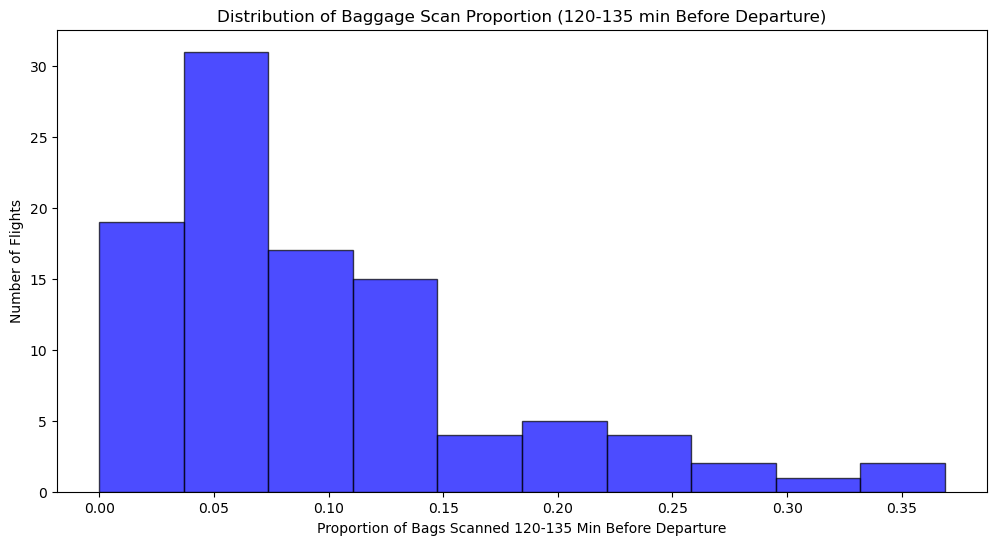

In [15]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# SQL Query to extract 100 unique flights and calculate baggage scan proportions
query = """
WITH UniqueFlights AS (
    SELECT DISTINCT OPERAT_FLIGHT_NBR, SCHD_LEG_DEP_LCL_TMS
    FROM LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL
    LIMIT 100
)
SELECT 
    UF.OPERAT_FLIGHT_NBR, 
    UF.SCHD_LEG_DEP_LCL_TMS,
    COUNT(BA.BAG_SCAN_LCL_TMS) AS total_bags,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) BETWEEN 120 AND 135
        THEN 1 ELSE 0 
    END) AS early_bags,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) BETWEEN 120 AND 135
        THEN 1 ELSE 0 
    END) / COUNT(BA.BAG_SCAN_LCL_TMS) AS proportion_early_scanned
FROM UniqueFlights UF
JOIN LOCAL_DATABASE.ORAAUE.BAGROOM_ARRIVAL BA
    ON UF.OPERAT_FLIGHT_NBR = BA.OPERAT_FLIGHT_NBR
    AND UF.SCHD_LEG_DEP_LCL_TMS = BA.SCHD_LEG_DEP_LCL_TMS
GROUP BY UF.OPERAT_FLIGHT_NBR, UF.SCHD_LEG_DEP_LCL_TMS
ORDER BY proportion_early_scanned DESC;


"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df)

# Plot the proportion distribution
plt.figure(figsize=(12, 6))
plt.hist(df['PROPORTION_EARLY_SCANNED'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Proportion of Bags Scanned 120-135 Min Before Departure')
plt.ylabel('Number of Flights')
plt.title('Distribution of Baggage Scan Proportion (120-135 min Before Departure)')
plt.show()

# Close the connection
cur.close()
conn.close()


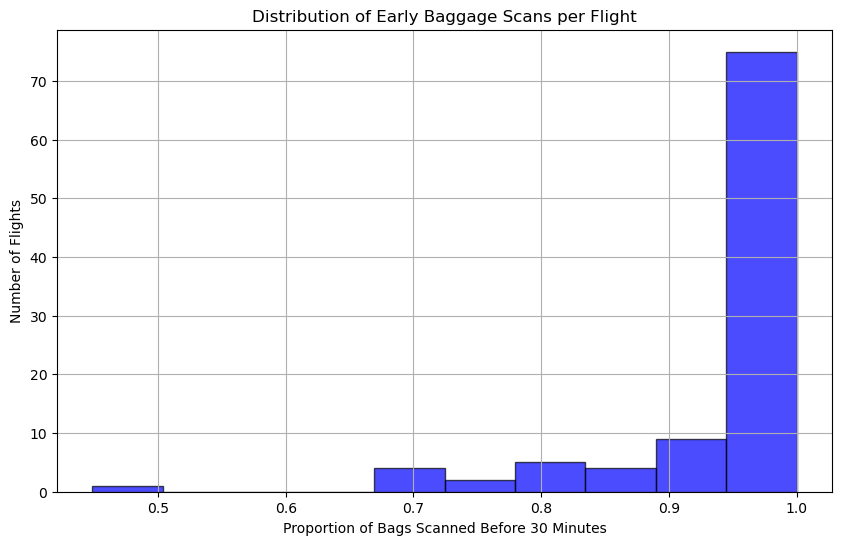

In [17]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# SQL Query
query = """
WITH UniqueFlights AS (
    SELECT DISTINCT OPERAT_FLIGHT_NBR, SCHD_LEG_DEP_LCL_TMS
    FROM BAGROOM_ARRIVAL
    LIMIT 100
)
SELECT 
    UF.OPERAT_FLIGHT_NBR, 
    UF.SCHD_LEG_DEP_LCL_TMS,
    COUNT(BA.BAG_SCAN_LCL_TMS) AS total_bags,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) >= 30 
        THEN 1 ELSE 0 
    END) AS bags_scanned_before_30_min,
    SUM(CASE 
        WHEN TIMESTAMPDIFF(MINUTE, BA.BAG_SCAN_LCL_TMS, UF.SCHD_LEG_DEP_LCL_TMS) >= 30 
        THEN 1 ELSE 0 
    END) / COUNT(BA.BAG_SCAN_LCL_TMS) AS proportion_scanned_before_30_min
FROM UniqueFlights UF
JOIN BAGROOM_ARRIVAL BA
    ON UF.OPERAT_FLIGHT_NBR = BA.OPERAT_FLIGHT_NBR
    AND UF.SCHD_LEG_DEP_LCL_TMS = BA.SCHD_LEG_DEP_LCL_TMS
GROUP BY UF.OPERAT_FLIGHT_NBR, UF.SCHD_LEG_DEP_LCL_TMS
ORDER BY proportion_scanned_before_30_min DESC;
"""

# Execute query
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

# Ensure correct column formatting
df.columns = df.columns.str.upper()
df['PROPORTION_SCANNED_BEFORE_30_MIN'] = df['PROPORTION_SCANNED_BEFORE_30_MIN'].astype(float)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['PROPORTION_SCANNED_BEFORE_30_MIN'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Proportion of Bags Scanned Before 30 Minutes')
plt.ylabel('Number of Flights')
plt.title('Distribution of Early Baggage Scans per Flight')
plt.grid(True)
plt.show()

# Close connection
cur.close()
conn.close()


In [9]:
import snowflake.connector

conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)
query = """
SELECT *
FROM BAGROOM_ARRIVAL
WHERE OPERAT_FLIGHT_NBR = '0078'
  AND SCHD_LEG_DEP_LCL_TMS = '2024-05-15 22:59:00';
"""

cur = conn.cursor()
cur.execute(query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]
cur.close()
conn.close()


In [11]:
data
df = pd.DataFrame(data, columns=columns)

In [12]:
df

,OPERAT_AIRLN_IATA_CD,SCHD_LEG_DEP_AIRPRT_IATA_CD,OPERAT_FLIGHT_NBR,SCHD_LEG_DEP_LCL_DT,SCHD_LEG_ARVL_AIRPRT_IATA_CD,SCHD_LEG_DEP_LCL_TMS,SCHD_LEG_DEP_GMT_TMS,SCHD_LEG_DEP_GMT_DT,SCHD_LEG_ARVL_LCL_TMS,SCHD_LEG_ARVL_LCL_DT,...,AVL_STA_MIRS_PRIORITY_CD,AVL_STA_MIRS_PRIORITY_REGION_DESC,INTERNATIONAL,BANK_ID,MKT_DAY_FREQUENCY,MKT_WEEK_FREQUENCY,MKT_DAY_DEP_SEQ,BAG_SCAN_UTC_TMS,BAG_SCAN_LCL_TMS,SF_LOAD_TMS
0,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:00,2024-05-15 18:34:00,2025-01-09 16:59:25.688
1,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:33:27,2024-05-15 18:33:27,2025-01-09 16:59:25.688
2,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:34:55,2024-05-15 18:34:55,2025-01-09 16:59:25.688
3,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:35:04,2024-05-15 18:35:04,2025-01-09 16:59:25.688
4,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:36:17,2024-05-15 18:36:17,2025-01-09 16:59:25.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:10:05,2024-05-15 18:10:05,2025-01-09 16:59:25.688
1178,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:09:47,2024-05-15 18:09:47,2025-01-09 16:59:25.688
1179,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:10:48,2024-05-15 18:10:48,2025-01-09 16:59:25.688
1180,AA,DFW,0078,2024-05-15,LHR,2024-05-15 22:59:00,2024-05-16 03:59:00,2024-05-16,2024-05-16 14:25:00,2024-05-16,...,0501,ATLANTIC,1,9,4,29,4,2024-05-15 23:13:23,2024-05-15 18:13:23,2025-01-09 16:59:25.688


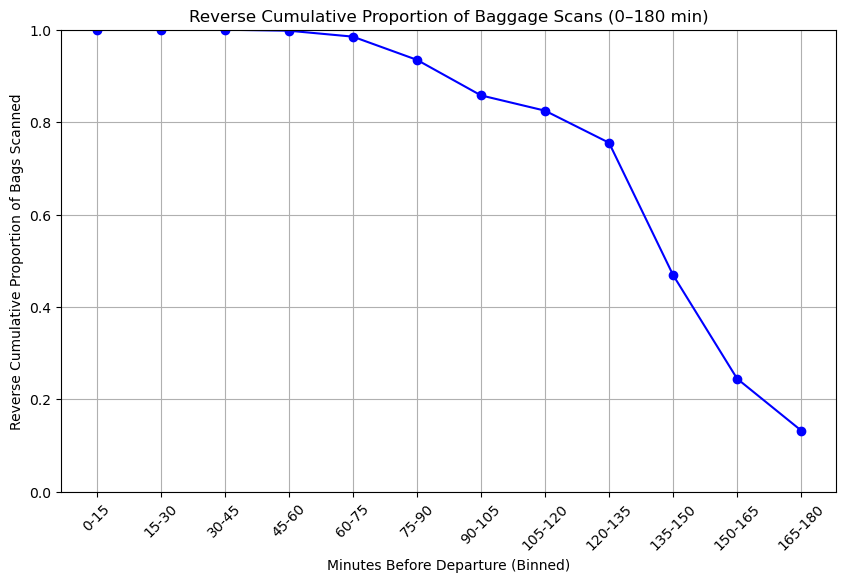

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convert times to datetime if not already
df['BAG_SCAN_LCL_TMS'] = pd.to_datetime(df['BAG_SCAN_LCL_TMS'])
df['SCHD_LEG_DEP_LCL_TMS'] = pd.to_datetime(df['SCHD_LEG_DEP_LCL_TMS'])

# Calculate how many minutes before departure each bag was scanned
df['MINUTES_BEFORE_DEPARTURE'] = (
    df['SCHD_LEG_DEP_LCL_TMS'] - df['BAG_SCAN_LCL_TMS']
).dt.total_seconds() / 60

df_filtered = df[(df['MINUTES_BEFORE_DEPARTURE'] >= 0) & 
                 (df['MINUTES_BEFORE_DEPARTURE'] <= 180)].copy()

# Create bins: 0-15, 15-30, ..., 165-180
bins = np.arange(0, 181, 15)  # [0, 15, 30, 45, ..., 180]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_filtered['TIME_BIN'] = pd.cut(
    df_filtered['MINUTES_BEFORE_DEPARTURE'],
    bins=bins,
    labels=labels,
    right=False  # so that 15 goes into bin 15-30, not 0-15
)
bin_counts = df_filtered['TIME_BIN'].value_counts().sort_index()
total_bags = bin_counts.sum()
reverse_cumulative_counts = bin_counts[::-1].cumsum()[::-1]
reverse_cumulative_proportions = reverse_cumulative_counts / total_bags
reverse_cumulative_df = pd.DataFrame({
    'TIME_BIN': bin_counts.index,  # e.g. ['0-15','15-30', ...]
    'BIN_COUNT': bin_counts.values,
    'REVERSE_CUMULATIVE_COUNT': reverse_cumulative_counts.values,
    'REVERSE_CUMULATIVE_PROPORTION': reverse_cumulative_proportions.values
})
plt.figure(figsize=(10, 6))
plt.plot(
    reverse_cumulative_df['TIME_BIN'],
    reverse_cumulative_df['REVERSE_CUMULATIVE_PROPORTION'],
    marker='o', linestyle='-', color='blue'
)
plt.xlabel('Minutes Before Departure (Binned)')
plt.ylabel('Reverse Cumulative Proportion of Bags Scanned')
plt.title('Reverse Cumulative Proportion of Baggage Scans (0–180 min)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


   TIME_BIN  BAG_COUNT  PROPORTION
0      0-15          0    0.000000
1     15-30          0    0.000000
2     30-45          2    0.002137
3     45-60         12    0.012821
4     60-75         47    0.050214
5     75-90         72    0.076923
6    90-105         31    0.033120
7   105-120         65    0.069444
8   120-135        268    0.286325
9   135-150        210    0.224359
10  150-165        105    0.112179
11  165-180        124    0.132479


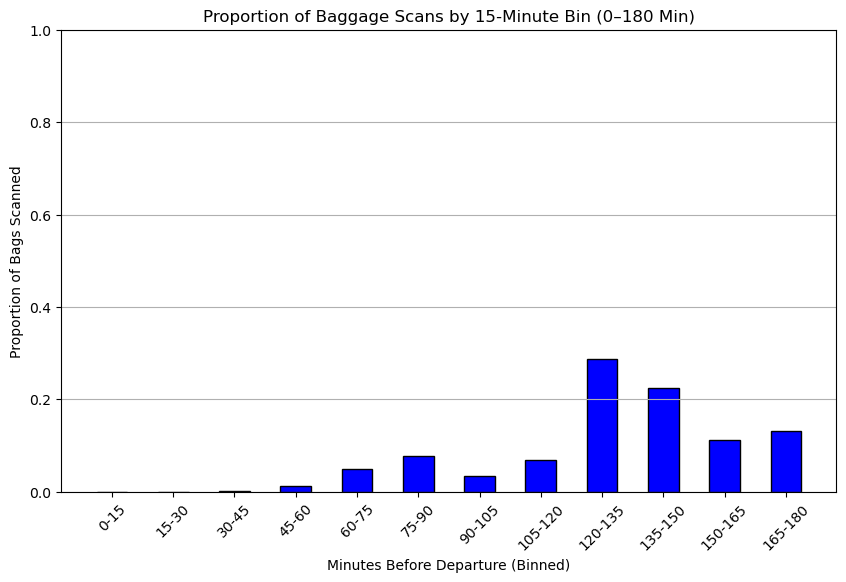

In [24]:
bin_proportions = bin_counts / total_bags

# 5. Create a summary DataFrame (optional)
proportions_df = pd.DataFrame({
    'TIME_BIN': bin_counts.index,
    'BAG_COUNT': bin_counts.values,
    'PROPORTION': bin_proportions.values
})

print(proportions_df)


plt.figure(figsize=(10, 6))
plt.bar(bin_counts.index, bin_proportions, width=0.5, color='blue', edgecolor='black')
plt.xlabel('Minutes Before Departure (Binned)')
plt.ylabel('Proportion of Bags Scanned')
plt.title('Proportion of Baggage Scans by 15-Minute Bin (0–180 Min)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [ ]:
total = len(df)


In [22]:
reverse_cumulative_df

,TIME_BIN,BIN_COUNT,REVERSE_CUMULATIVE_COUNT,REVERSE_CUMULATIVE_PROPORTION
0,0-15,0,936,1.000000
1,15-30,0,936,1.000000
2,30-45,2,936,1.000000
3,45-60,12,934,0.997863
4,60-75,47,922,0.985043
5,75-90,72,875,0.934829
6,90-105,31,803,0.857906
7,105-120,65,772,0.824786
8,120-135,268,707,0.755342
9,135-150,210,439,0.469017


TIME_BIN
0-15         0
15-30        0
30-45        2
45-60       14
60-75       61
75-90      133
90-105     164
105-120    229
120-135    497
135-150    707
150-165    812
165-180    936
Name: count, dtype: int64

# Pytorch Modeling

In [1]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to Snowflake
conn = snowflake.connector.connect(
    user='EMORY_spring2025_group02',
    password='EDSC2025spring',
    account='aa-itor-universities',
    warehouse='UNIVERSITY_READER',
    database='LOCAL_DATABASE',
    schema='ORAAUE'
)

cur = conn.cursor()

# 1. Query the total number of rows in the dataset
count_query = "SELECT COUNT(*) FROM BAGROOM_ARRIVAL"
cur.execute(count_query)
total_rows = cur.fetchone()[0]
print(f"Total number of rows in the dataset: {total_rows}")

/Users/jackson/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Total number of rows in the dataset: 50968404


In [24]:
# Choose a sample size that your MacBook can handle; here, 200,000 rows is chosen
sample_size = 200000

# Extract a sample dataset; Option A: First 200k rows, Option B: Random sample
sample_query = f"SELECT * FROM BAGROOM_ARRIVAL LIMIT {sample_size}"
cur.execute(sample_query)
data = cur.fetchall()
columns = [desc[0] for desc in cur.description]

# Convert to a Pandas DataFrame
df = pd.DataFrame(data, columns=columns)
print("Sample dataset loaded successfully.")

# Close connection
cur.close()
conn.close()


InterfaceError: 252006: Cursor is closed in execute.

In [70]:
df = pd.DataFrame(data, columns=columns)

In [72]:
selected_columns = ['OPERAT_FLIGHT_NBR','SCHD_LEG_DEP_AIRPRT_IATA_CD', 'SCHD_LEG_ARVL_AIRPRT_IATA_CD', 'SCHD_LEG_DEP_LCL_TMS','SCHD_LEG_ARVL_LCL_TMS','MILE_GREAT_CIRCLE_DISTANC_QTY','FLIGHT_LEG_TTL_AVAIL_SEAT_CT','SCHD_LEG_BLOCK_MIN_CT','SCHD_AIRCAFT_EQUIP_CD','CREW_EQUIP_CD', 'FLEET_CD', 'INTERNATIONAL','MKT_DAY_FREQUENCY','MKT_WEEK_FREQUENCY','MKT_DAY_DEP_SEQ','BAG_SCAN_LCL_TMS']

In [73]:
df = df[selected_columns]

In [74]:
df

,OPERAT_FLIGHT_NBR,SCHD_LEG_DEP_AIRPRT_IATA_CD,SCHD_LEG_ARVL_AIRPRT_IATA_CD,SCHD_LEG_DEP_LCL_TMS,SCHD_LEG_ARVL_LCL_TMS,MILE_GREAT_CIRCLE_DISTANC_QTY,FLIGHT_LEG_TTL_AVAIL_SEAT_CT,SCHD_LEG_BLOCK_MIN_CT,SCHD_AIRCAFT_EQUIP_CD,CREW_EQUIP_CD,FLEET_CD,INTERNATIONAL,MKT_DAY_FREQUENCY,MKT_WEEK_FREQUENCY,MKT_DAY_DEP_SEQ,BAG_SCAN_LCL_TMS
0,0078,DFW,LHR,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,4,29,4,2024-05-15 18:34:00
1,0078,DFW,LHR,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,4,29,4,2024-05-15 18:33:27
2,0078,DFW,LHR,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,4,29,4,2024-05-15 18:34:55
3,0078,DFW,LHR,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,4,29,4,2024-05-15 18:35:04
4,0078,DFW,LHR,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,4,29,4,2024-05-15 18:36:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1091,DFW,CLT,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,9,66,1,2024-05-27 03:14:15
199996,1091,DFW,CLT,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,9,66,1,2024-05-27 03:14:30
199997,1091,DFW,CLT,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,9,66,1,2024-05-27 03:13:53
199998,1091,DFW,CLT,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,9,66,1,2024-05-27 03:14:23


In [75]:
import pandas as pd
import numpy as np

# Suppose df has columns: [BAG_SCAN_LCL_TMS, SCHD_LEG_DEP_LCL_TMS, ... flight features ...]

df['BAG_SCAN_LCL_TMS'] = pd.to_datetime(df['BAG_SCAN_LCL_TMS'])
df['SCHD_LEG_DEP_LCL_TMS'] = pd.to_datetime(df['SCHD_LEG_DEP_LCL_TMS'])

# y = minutes before departure
df['MINUTES_BEFORE_DEPARTURE'] = (
    df['SCHD_LEG_DEP_LCL_TMS'] - df['BAG_SCAN_LCL_TMS']
).dt.total_seconds() / 60

In [76]:
df['DAY_OF_WEEK'] = df['SCHD_LEG_DEP_LCL_TMS'].dt.dayofweek  # Monday=0, Sunday=6
print(df['DAY_OF_WEEK'])
df['Monday'] = (df['DAY_OF_WEEK'] == 0).astype(int)
df['Tuesday'] = (df['DAY_OF_WEEK'] == 1).astype(int)
df['Wednesday'] = (df['DAY_OF_WEEK'] == 2).astype(int)
df['Thursday'] = (df['DAY_OF_WEEK'] == 3).astype(int)
df['Friday'] = (df['DAY_OF_WEEK'] == 4).astype(int)
df['Saturday'] = (df['DAY_OF_WEEK'] == 5).astype(int)
df['Sunday'] = (df['DAY_OF_WEEK'] == 6).astype(int)


0         2
1         2
2         2
3         2
4         2
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Name: DAY_OF_WEEK, Length: 200000, dtype: int32


In [77]:
df = pd.get_dummies(df, columns=['SCHD_LEG_DEP_AIRPRT_IATA_CD'])
df = pd.get_dummies(df, columns=['SCHD_LEG_ARVL_AIRPRT_IATA_CD'])

In [78]:
df

,OPERAT_FLIGHT_NBR,SCHD_LEG_DEP_LCL_TMS,SCHD_LEG_ARVL_LCL_TMS,MILE_GREAT_CIRCLE_DISTANC_QTY,FLIGHT_LEG_TTL_AVAIL_SEAT_CT,SCHD_LEG_BLOCK_MIN_CT,SCHD_AIRCAFT_EQUIP_CD,CREW_EQUIP_CD,FLEET_CD,INTERNATIONAL,...,SCHD_LEG_ARVL_AIRPRT_IATA_CD_TPA,SCHD_LEG_ARVL_AIRPRT_IATA_CD_TQO,SCHD_LEG_ARVL_AIRPRT_IATA_CD_TUL,SCHD_LEG_ARVL_AIRPRT_IATA_CD_TUS,SCHD_LEG_ARVL_AIRPRT_IATA_CD_TYS,SCHD_LEG_ARVL_AIRPRT_IATA_CD_VPS,SCHD_LEG_ARVL_AIRPRT_IATA_CD_XNA,SCHD_LEG_ARVL_AIRPRT_IATA_CD_YVR,SCHD_LEG_ARVL_AIRPRT_IATA_CD_YYC,SCHD_LEG_ARVL_AIRPRT_IATA_CD_YYZ
0,0078,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,...,False,False,False,False,False,False,False,False,False,False
1,0078,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,...,False,False,False,False,False,False,False,False,False,False
2,0078,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,...,False,False,False,False,False,False,False,False,False,False
3,0078,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,...,False,False,False,False,False,False,False,False,False,False
4,0078,2024-05-15 22:59:00,2024-05-16 14:25:00,4751,304,566,82,777,777,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1091,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,...,False,False,False,False,False,False,False,False,False,False
199996,1091,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,...,False,False,False,False,False,False,False,False,False,False
199997,1091,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,...,False,False,False,False,False,False,False,False,False,False
199998,1091,2024-05-27 05:00:00,2024-05-27 08:30:00,936,196,150,26,320,321,0,...,False,False,False,False,False,False,False,False,False,False


In [80]:
# 1. Define 15-minute bins from 0 to 180 minutes
bins = np.arange(0, 181, 15)

def make_histogram(minutes_list):
    """
    Given a list of 'minutes before departure' for bag scans,
    return the histogram counts in each bin.
    """
    hist, _ = np.histogram(minutes_list, bins=bins)
    return hist

# 2. Group by (OPERAT_FLIGHT_NBR, SCHD_LEG_DEP_LCL_DT)
groups = df.groupby(["OPERAT_FLIGHT_NBR", "SCHD_LEG_DEP_LCL_TMS"])

rows = []
for (flight_nbr, dep_date), group_data in groups:
    # (A) Flight-level features
    # You can pick columns that are the same for all bags in this flight
    # For example:
    #   'MILE_GREAT_CIRCLE_DISTANC_QTY', 'SCHD_LEG_BLOCK_MIN_CT', etc.
    #   If you need multiple columns, just grab them all at once
    flight_features = group_data.iloc[0][[
        'MILE_GREAT_CIRCLE_DISTANC_QTY','FLIGHT_LEG_TTL_AVAIL_SEAT_CT','SCHD_LEG_BLOCK_MIN_CT','SCHD_AIRCAFT_EQUIP_CD','CREW_EQUIP_CD', 'FLEET_CD', 'INTERNATIONAL','MKT_DAY_FREQUENCY','MKT_WEEK_FREQUENCY','MKT_DAY_DEP_SEQ'
        # ... add other flight-level columns you want ...
    ]]

    # (B) All bag-level "minutes before departure" for this flight
    bag_times = group_data["MINUTES_BEFORE_DEPARTURE"].values

    # (C) Create a histogram for these bag scans
    hist = make_histogram(bag_times)

    # Build a dictionary for this flight's row
    row_dict = flight_features.to_dict()  # Convert flight features to a dict

    # (D) Add the histogram counts to the dictionary
    for i in range(len(hist)):
        bin_label = f"BIN_{bins[i]}_{bins[i+1]}"
        row_dict[bin_label] = hist[i]

    rows.append(row_dict)

# 3. Create a new DataFrame with one row per flight
flight_df = pd.DataFrame(rows)

# 4. (Optional) Convert bin counts to proportions
bin_cols = [f"BIN_{bins[i]}_{bins[i+1]}" for i in range(len(bins)-1)]
flight_df[bin_cols] = flight_df[bin_cols].div(flight_df[bin_cols].sum(axis=1), axis=0)

# Now 'flight_df' has one row per flight, with your binned distribution.
print(flight_df.head())

   MILE_GREAT_CIRCLE_DISTANC_QTY  FLIGHT_LEG_TTL_AVAIL_SEAT_CT  \
0                           4751                           272   
1                           4751                           303   
2                           4966                           285   
3                           4966                           272   
4                           4966                           272   

   SCHD_LEG_BLOCK_MIN_CT SCHD_AIRCAFT_EQUIP_CD CREW_EQUIP_CD FLEET_CD  \
0                    555                   83            777      777   
1                    540                   83            777      777   
2                    525                   96            787      787   
3                    545                   83            777      777   
4                    545                   83            777      777   

   INTERNATIONAL  MKT_DAY_FREQUENCY  MKT_WEEK_FREQUENCY  MKT_DAY_DEP_SEQ  ...  \
0              1                  4                  28                2  ...   
1 

In [82]:
flight_df.columns

Index(['MILE_GREAT_CIRCLE_DISTANC_QTY', 'FLIGHT_LEG_TTL_AVAIL_SEAT_CT',
       'SCHD_LEG_BLOCK_MIN_CT', 'SCHD_AIRCAFT_EQUIP_CD', 'CREW_EQUIP_CD',
       'FLEET_CD', 'INTERNATIONAL', 'MKT_DAY_FREQUENCY', 'MKT_WEEK_FREQUENCY',
       'MKT_DAY_DEP_SEQ', 'BIN_0_15', 'BIN_15_30', 'BIN_30_45', 'BIN_45_60',
       'BIN_60_75', 'BIN_75_90', 'BIN_90_105', 'BIN_105_120', 'BIN_120_135',
       'BIN_135_150', 'BIN_150_165', 'BIN_165_180'],
      dtype='object')

In [109]:
# 1A. Identify feature columns (X) vs. distribution columns (y)
bin_cols = [
    'BIN_0_15', 'BIN_15_30', 'BIN_30_45', 'BIN_45_60', 'BIN_60_75', 'BIN_75_90',
    'BIN_90_105', 'BIN_105_120', 'BIN_120_135', 'BIN_135_150', 'BIN_150_165', 'BIN_165_180'
]
feature_cols = [
    'MILE_GREAT_CIRCLE_DISTANC_QTY',
    'FLIGHT_LEG_TTL_AVAIL_SEAT_CT',
    'SCHD_LEG_BLOCK_MIN_CT',
    'SCHD_AIRCAFT_EQUIP_CD',
    'CREW_EQUIP_CD',
    'FLEET_CD',
    'INTERNATIONAL',
    'MKT_DAY_FREQUENCY',
    'MKT_WEEK_FREQUENCY',
    'MKT_DAY_DEP_SEQ'
]

# 1B. Extract X and y as numpy arrays (float32)
X = flight_df[feature_cols].values.astype(np.float32)
y = flight_df[bin_cols].values.astype(np.float32)

# (Optional) Check that each row of y sums to ~1 if it's a proportion
# print(y.sum(axis=1))

# 1C. Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [110]:
import torch
from torch.utils.data import Dataset, DataLoader

class FlightDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = FlightDataset(X_train, y_train)
test_dataset = FlightDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [111]:
import torch.nn as nn
import torch.nn.functional as F

class FlightDistributionNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # Example architecture: 2 hidden layers of size 32
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # No activation on final layer -> raw outputs
        out = self.fc3(x)
        return out

model = FlightDistributionNet(input_dim=len(feature_cols), output_dim=len(bin_cols))


In [112]:
import torch.optim as optim

# Initialize optimizer & loss
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)  # MSE with the distribution
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * batch_X.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10000, Loss: 1961.3449
Epoch 2/10000, Loss: 343.1769
Epoch 3/10000, Loss: 136.2933
Epoch 4/10000, Loss: 59.3138
Epoch 5/10000, Loss: 33.3057
Epoch 6/10000, Loss: 22.7352
Epoch 7/10000, Loss: 16.3520
Epoch 8/10000, Loss: 12.5802
Epoch 9/10000, Loss: 9.9811
Epoch 10/10000, Loss: 8.3011
Epoch 11/10000, Loss: 7.0172
Epoch 12/10000, Loss: 6.0367
Epoch 13/10000, Loss: 5.3550
Epoch 14/10000, Loss: 4.8159
Epoch 15/10000, Loss: 4.3747
Epoch 16/10000, Loss: 4.0381
Epoch 17/10000, Loss: 3.7199
Epoch 18/10000, Loss: 3.4486
Epoch 19/10000, Loss: 3.2191
Epoch 20/10000, Loss: 3.0133
Epoch 21/10000, Loss: 2.8417
Epoch 22/10000, Loss: 2.5355
Epoch 23/10000, Loss: 2.2027
Epoch 24/10000, Loss: 1.9518
Epoch 25/10000, Loss: 1.7521
Epoch 26/10000, Loss: 1.6037
Epoch 27/10000, Loss: 1.4836
Epoch 28/10000, Loss: 1.3876
Epoch 29/10000, Loss: 1.3109
Epoch 30/10000, Loss: 1.2417
Epoch 31/10000, Loss: 1.1747
Epoch 32/10000, Loss: 1.1152
Epoch 33/10000, Loss: 1.0649
Epoch 34/10000, Loss: 1.0211
Epoch 35/10

In [113]:
model.eval()
test_loss = 0.0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        test_loss += loss.item() * batch_X.size(0)

test_loss /= len(test_dataset)
print(f"Test MSE Loss: {test_loss:.4f}")


Test MSE Loss: 0.0049


In [114]:
X[0]

array([4.751e+03, 2.720e+02, 5.550e+02, 8.300e+01, 7.770e+02, 7.770e+02,
       1.000e+00, 4.000e+00, 2.800e+01, 2.000e+00], dtype=float32)

In [121]:
# Make sure the model is in evaluation mode
model.eval()

# Pick a single sample (e.g., the first row)
with torch.no_grad():
    # Get the first sample (unsqueeze to add batch dimension)
    sample_input = X_tensor[0].unsqueeze(0)  # shape: [1, input_dim]
    sample_target = y_tensor[0].unsqueeze(0)   # shape: [1, output_dim]
    
    # Run the model to get the prediction
    sample_pred = model(sample_input)

print("Input Features:")
print(sample_input)  # These are your flight-level input features

print("\nTrue Distribution (Target):")
print(sample_target)  # The true 12-dimensional bin proportions

print("\nPredicted Distribution:")
print(sample_pred)    # The model's predicted 12-dimensional probability distribution


Input Features:
tensor([[4.7510e+03, 2.7200e+02, 5.5500e+02, 8.3000e+01, 7.7700e+02, 7.7700e+02,
         1.0000e+00, 4.0000e+00, 2.8000e+01, 2.0000e+00]])

True Distribution (Target):
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0421, 0.0680, 0.1230, 0.1489, 0.1553,
         0.1683, 0.1456, 0.1489]])

Predicted Distribution:
tensor([[0.0136, 0.0246, 0.0297, 0.0433, 0.0774, 0.1032, 0.1372, 0.1434, 0.1357,
         0.1127, 0.1013, 0.0807]])


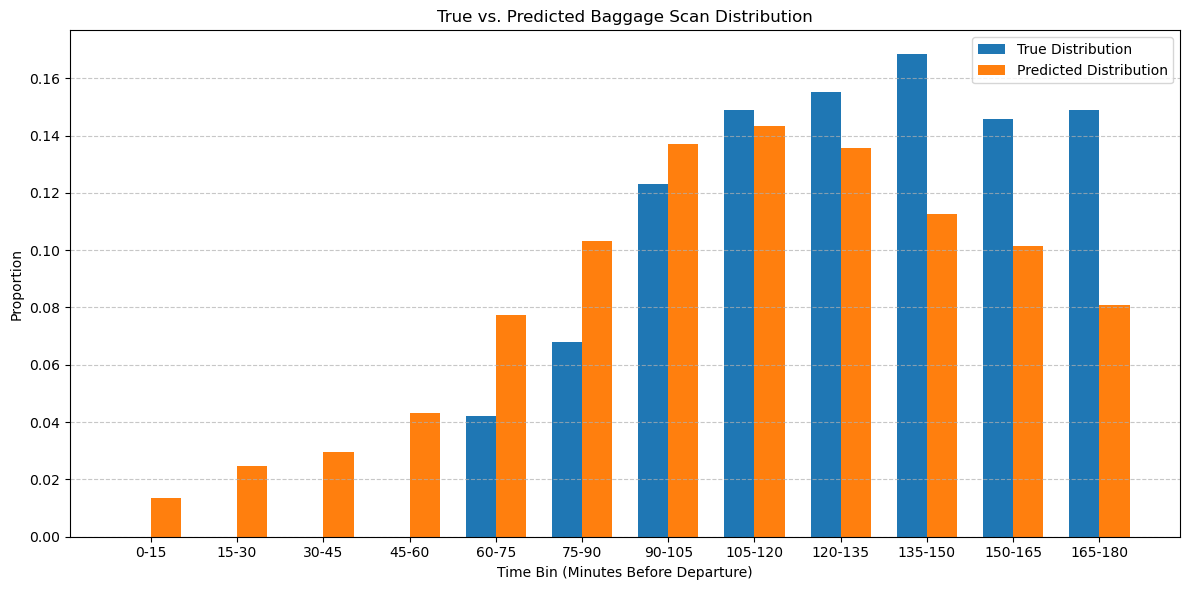

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Define bin labels
bin_labels = ["0-15", "15-30", "30-45", "45-60", "60-75", 
              "75-90", "90-105", "105-120", "120-135", "135-150", 
              "150-165", "165-180"]

# True and predicted distributions (from your tensors)
true_dist = np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0421, 0.0680, 0.1230, 0.1489, 0.1553,
         0.1683, 0.1456, 0.1489])
pred_dist = np.array([0.0136, 0.0246, 0.0297, 0.0433, 0.0774, 0.1032, 0.1372, 0.1434, 0.1357,
         0.1127, 0.1013, 0.0807])

# Create x-axis positions for the bins
x = np.arange(len(bin_labels))
width = 0.35  # width of the bars

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, true_dist, width, label="True Distribution")
plt.bar(x + width/2, pred_dist, width, label="Predicted Distribution")

# Customize the plot
plt.xticks(x, bin_labels)
plt.xlabel("Time Bin (Minutes Before Departure)")
plt.ylabel("Proportion")
plt.title("True vs. Predicted Baggage Scan Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
